In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('titanic_toy.csv')

In [ ]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
X=df.iloc[:, 0:3]
y=df.iloc[:, 3]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [ ]:
X_train_mean_age=X_train['Age'].mean()
X_test_mean_age=X_test['Age'].mean()

X_train['Age_mean']=X_train['Age'].fillna(X_train_mean_age)
X_test['Age_mean']=X_test['Age'].fillna(X_test_mean_age)

X_train_mean_fare=X_train['Fare'].mean()
X_test_mean_fare=X_test['Fare'].mean()

X_train['Fare_mean']=X_train['Fare'].fillna(X_train_mean_fare)
X_test['Fare_mean']=X_test['Fare'].fillna(X_test_mean_fare)

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Fare_mean
874,28.0,24.0000,1,28.0,24.000000
512,36.0,26.2875,0,36.0,26.287500
103,33.0,8.6542,0,33.0,8.654200
687,19.0,10.1708,0,19.0,10.170800
194,44.0,NaN,0,44.0,32.617597


In [ ]:
X_test.sample(5)

,Age,Fare,Family,Age_mean,Fare_mean
643,NaN,56.4958,0,29.3728,56.4958
258,35.0,512.3292,0,35.0000,512.3292
198,NaN,7.7500,0,29.3728,7.7500
606,30.0,7.8958,0,30.0000,7.8958
15,55.0,16.0000,0,55.0000,16.0000


In [ ]:
f"Variance before imputation of Fare: {X_train['Fare'].var()}"


'Variance before imputation of Fare: 2448.197913706318'

In [ ]:
f"Variance after imputation of Fare: {X_train['Fare_mean'].var()}"

'Variance after imputation of Fare: 2324.2385256705547'

In [ ]:
print(f"Variance before imputation of Age: {X_train['Age'].var()}")
print(f"Variance after imputation of Age: {X_train['Age_mean'].var()}")

Variance before imputation of Age: 204.3495133904614
Variance after imputation of Age: 161.81262452718673


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_mean,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,0.090156
Fare,0.092644,1.000000,0.208268,0.088069,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,0.205499
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.086078
Fare_mean,0.090156,1.000000,0.205499,0.086078,1.000000


In [ ]:
X_train.cov()

,Age,Fare,Family,Age_mean,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,66.665205
Fare,70.719262,2448.197914,17.258917,55.603719,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,16.385048
Age_mean,204.349513,55.603719,-5.146106,161.812625,52.788341
Fare_mean,66.665205,2448.197914,16.385048,52.788341,2324.238526


<Axes: >

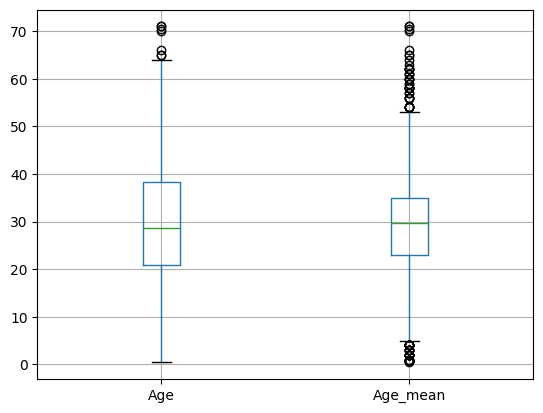

In [ ]:
X_train[['Age', 'Age_mean']].boxplot()

<Axes: >

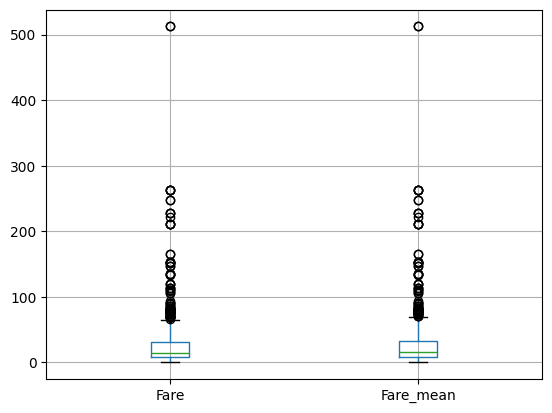

In [ ]:
X_train[['Fare', 'Fare_mean']].boxplot()

In [ ]:
transformer=ColumnTransformer(transformers=([
    ('trf1', SimpleImputer(strategy='mean'), ['Age']),
    ('trf2', SimpleImputer(strategy='mean'), ['Fare'])
]), remainder="passthrough")

In [ ]:
transformer.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(), ['Age']),
                                ('trf2', SimpleImputer(), ['Fare'])])

In [ ]:
transformer.named_transformers_['trf1'].statistics_

array([29.78590426])

In [ ]:
transformer.named_transformers_['trf2'].statistics_

array([32.61759689])